In [1]:
# Import functions needed for this notebook
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod.families import NegativeBinomial
from statsmodels.discrete.discrete_model import NegativeBinomial as CountNB
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load the dataset
df = pd.read_excel("thesis_dataset.xlsx")
df.head()

,player_name,highest_ranking,country,mother_occupation,father_occupation,sibling_info,sibling_player,titles_won,association,year_turned_pro,father_occupation_std,mother_occupation_std,father_ISEI,mother_ISEI,family_ISEI
0,Roger Federer,1,Switzerland,employee at pharmaceutical firm,executive at pharmaceutical firm,True,False,103,ATP,1998,Managing directors and chief executives,Pharmaceutical technicians and assistants,70,40,55
1,Taylor Fritz,4,USA,professional tennis player,professional tennis player,True,False,8,ATP,2015,Athletes and sports players,Athletes and sports players,46,46,46
2,Novak Djokovic,1,Serbia,entrepreneur,professional skier,True,True,99,ATP,2003,Athletes and sports players,Managing directors and chief executives,46,70,58
3,Jessica Pegula,3,USA,CEO,business owner,True,False,8,WTA,2009,Managing directors and chief executives,Managing directors and chief executives,70,70,70
4,Grigor Dimitrov,3,Bulgaria,volleyball player,tennis coach,False,False,9,ATP,2008,Athletes and sports players,Athletes and sports players,46,46,46


In [3]:
# Convert boolean columns to integers
df['sibling_info'] = df['sibling_info'].astype(int)
df['sibling_player'] = df['sibling_player'].astype(int)

df.head()

,player_name,highest_ranking,country,mother_occupation,father_occupation,sibling_info,sibling_player,titles_won,association,year_turned_pro,father_occupation_std,mother_occupation_std,father_ISEI,mother_ISEI,family_ISEI
0,Roger Federer,1,Switzerland,employee at pharmaceutical firm,executive at pharmaceutical firm,1,0,103,ATP,1998,Managing directors and chief executives,Pharmaceutical technicians and assistants,70,40,55
1,Taylor Fritz,4,USA,professional tennis player,professional tennis player,1,0,8,ATP,2015,Athletes and sports players,Athletes and sports players,46,46,46
2,Novak Djokovic,1,Serbia,entrepreneur,professional skier,1,1,99,ATP,2003,Athletes and sports players,Managing directors and chief executives,46,70,58
3,Jessica Pegula,3,USA,CEO,business owner,1,0,8,WTA,2009,Managing directors and chief executives,Managing directors and chief executives,70,70,70
4,Grigor Dimitrov,3,Bulgaria,volleyball player,tennis coach,0,0,9,ATP,2008,Athletes and sports players,Athletes and sports players,46,46,46


In [4]:
# Create the association dummy (ATP baseline, keep WTA)
df['association_WTA'] = (df['association'] == 'WTA').astype(int)

In [5]:
# Get the total number of distinct countries from the `country` column
distinct_countries = df['country'].nunique()
print(f"Total distinct countries: {distinct_countries}")

Total distinct countries: 29


In [6]:
# Get the top 5 countries by the number of players
top_countries = df['country'].value_counts().head(5).index.tolist()
print("Top 5 countries by number of players: ", top_countries)

Top 5 countries by number of players:  ['USA', 'Russia', 'Australia', 'France', 'Spain']


In [7]:
# Dynamically create top-5 country dummies
for c in top_countries:
    df[f'country_{c.replace(" ","_")}'] = (df['country']==c).astype(int)

In [8]:
# Examine mean and variance of the `highest_ranking` column
mean_highest_rank = df['highest_ranking'].mean()
var_highest_rank = df['highest_ranking'].var()

print(f"Mean of highest_ranking: {mean_highest_rank}")
print(f"Variance of highest_ranking: {var_highest_rank}")

Mean of highest_ranking: 5.43
Variance of highest_ranking: 89.1970707070707


### Model 1: Ranking ~ Family ISEI, Sibling Info, Association Dummies, Country Dummies

In [9]:
# Prepare predictors for regression
predictors = ['family_ISEI','sibling_info', 'association_WTA'] + [f'country_{c.replace(" ","_")}' for c in top_countries]

In [ ]:
# Prepare regression matrices
Y = df['highest_ranking']
X = sm.add_constant(df[predictors])

In [11]:
# Poisson regression model
model_Poisson = sm.GLM(Y, X, family=sm.families.Poisson()).fit()

# Print the summary of the Poisson model
print(model_Poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        highest_ranking   No. Observations:                  100
Model:                            GLM   Df Residuals:                       91
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -470.81
Date:                Sat, 07 Jun 2025   Deviance:                       648.49
Time:                        16:06:16   Pearson chi2:                 1.06e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.7984
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7780      0.29

In [12]:
# Fit Negative Binomial regression model
model_NegBin = sm.GLM(Y, X, family=NegativeBinomial()).fit()

# Print the summary of the Negative Binomial model
print(model_NegBin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        highest_ranking   No. Observations:                  100
Model:                            GLM   Df Residuals:                       91
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -265.17
Date:                Sat, 07 Jun 2025   Deviance:                       84.943
Time:                        16:06:16   Pearson chi2:                     147.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2245
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7469      0.64

c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [13]:
# Print the AIC and BIC for both models
print(f"AIC for Poisson model: {model_Poisson.aic}")
print(f"BIC for Poisson model: {model_Poisson.bic}")
print(f"AIC for Negative Binomial model: {model_NegBin.aic}")
print(f"BIC for Negative Binomial model: {model_NegBin.bic}")

AIC for Poisson model: 959.611230069731
BIC for Poisson model: 229.41946581641076
AIC for Negative Binomial model: 548.3488624535688
BIC for Negative Binomial model: -334.1276369768379


c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1838: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [14]:
# Check empirical dispersion from Negative Binomial model
dispersion = model_NegBin.deviance / model_NegBin.df_resid
print(f"Empirical Dispersion: {dispersion:.2f}")

Empirical Dispersion: 0.93


In [15]:
# Calculate the "true" dispersion parameter
nb2 = CountNB(Y, X).fit(disp=False, maxiter=100, method='newton')

print("Converged:", nb2.mle_retvals['converged'])
print("Alpha estimate:", nb2.params['alpha'])

Converged: True
Alpha estimate: nan


c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:3612: RuntimeWarning: invalid value encountered in log
  np.log(prob) - (y - mu)/(a1+mu))
c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:3470: RuntimeWarning: invalid value encountered in log
  dalpha = (dgpart + np.log(a1)


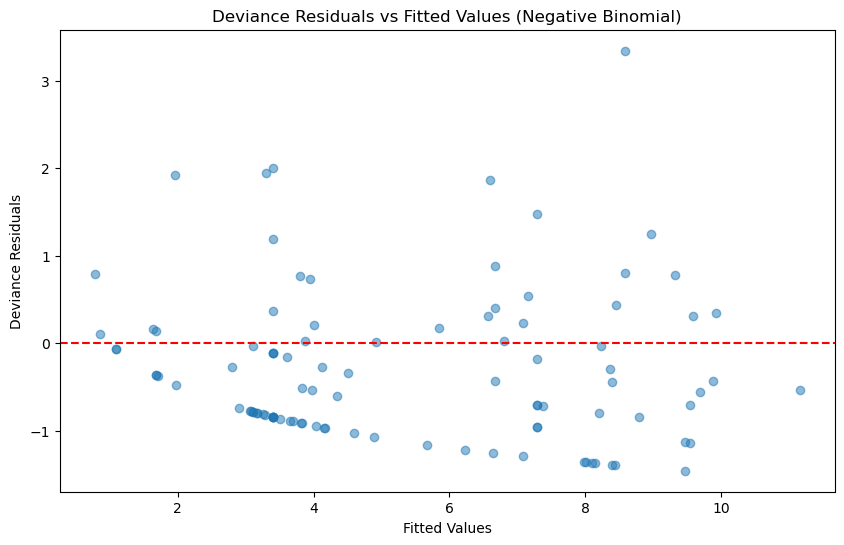

In [16]:
# Extract deviance residuals and fitted values
deviance_residuals = model_NegBin.resid_deviance
fitted_values = model_NegBin.fittedvalues

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, deviance_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Deviance Residuals vs Fitted Values (Negative Binomial)')
plt.xlabel('Fitted Values')
plt.ylabel('Deviance Residuals')
plt.show()

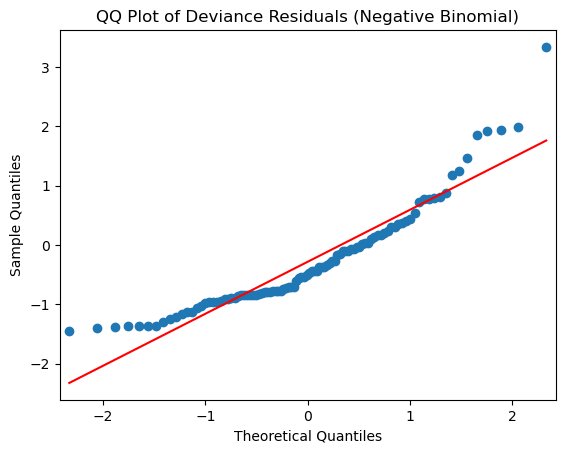

In [17]:
# QQ plot for deviance residuals
sm.qqplot(deviance_residuals, line='s')
plt.title('QQ Plot of Deviance Residuals (Negative Binomial)')
plt.show()

In [18]:
# Build the matrix for VIF (no constant needed):
X_vif = df[predictors]

# Compute VIFs:
vif_data = pd.DataFrame({
    'Variable': X_vif.columns,
    'VIF': [variance_inflation_factor(X_vif.values, i)
            for i in range(X_vif.shape[1])]
})

print(vif_data)

            Variable       VIF
0        family_ISEI  9.019623
1       sibling_info  8.710310
2    association_WTA  1.797047
3        country_USA  1.563024
4     country_Russia  1.130389
5  country_Australia  1.135650
6     country_France  1.125239
7      country_Spain  1.112190


### Model 2: Ranking: Family ISEI, Sibling Info, ISEIxSibling interaction, Association Dummies, Country Dummies

In [19]:
# Mean center the family ISEI variable
df['family_ISEI_c'] = df['family_ISEI'] - df['family_ISEI'].mean()

# Create interaction term between family ISEI and sibling info
df['family_ISEI_x_sibling_info'] = df['family_ISEI_c'] * df['sibling_info']

# Define predictors for Model 2
predictors2 = ['family_ISEI_c', 'sibling_info', 'family_ISEI_x_sibling_info', 'association_WTA'] + [f'country_{c.replace(" ", "_")}' for c in top_countries]

In [20]:
# Check multicollinearity using Variance Inflation Factor (VIF)
X2_vif = df[predictors2]
vif_data2 = pd.DataFrame({
    'Variable': X2_vif.columns,
    'VIF': [variance_inflation_factor(X2_vif.values, i)
            for i in range(X2_vif.shape[1])]
})
print("VIF with interaction term:\n", vif_data2)

VIF with interaction term:
                      Variable        VIF
0               family_ISEI_c  16.011079
1                sibling_info   2.728196
2  family_ISEI_x_sibling_info  15.930191
3             association_WTA   1.703264
4                 country_USA   1.553587
5              country_Russia   1.097616
6           country_Australia   1.140505
7              country_France   1.124511
8               country_Spain   1.112906


In [21]:
# Prepare regression matrices for Model 2
Y2 = df['highest_ranking']
X2 = sm.add_constant(df[predictors2])

# Fit the Negative Binomial regression model with interaction term
model_NegBin2 = sm.GLM(Y2, X2, family=NegativeBinomial()).fit()

# Print the summary of the Negative Binomial model with interaction term
print(model_NegBin2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        highest_ranking   No. Observations:                  100
Model:                            GLM   Df Residuals:                       90
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -263.89
Date:                Sat, 07 Jun 2025   Deviance:                       82.379
Time:                        16:06:17   Pearson chi2:                     137.
No. Iterations:                    12   Pseudo R-squ. (CS):             0.2441
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


### Model 3: Ranking ~ Family ISEI, Sibling Player, Association Dummies, Country Dummies

In [22]:
# Define predictors for Model 3
predictors3 = ['family_ISEI', 'sibling_player', 'association_WTA'] + [f'country_{c.replace(" ", "_")}' for c in top_countries]

# Check multicollinearity using Variance Inflation Factor (VIF)
X3_vif = df[predictors3]
vif_data3 = pd.DataFrame({
    'Variable': X3_vif.columns,
    'VIF': [variance_inflation_factor(X3_vif.values, i)
            for i in range(X3_vif.shape[1])]
})
print("VIF after dropping sibling_info:\n", vif_data3)

VIF after dropping sibling_info:
             Variable       VIF
0        family_ISEI  3.725080
1     sibling_player  2.069165
2    association_WTA  1.789530
3        country_USA  1.564573
4     country_Russia  1.135001
5  country_Australia  1.104019
6     country_France  1.112581
7      country_Spain  1.122396


In [23]:
# Prepare regression matrices for Model 3
Y3 = df['highest_ranking']
X3 = sm.add_constant(df[predictors3])

# Fit the Negative Binomial regression model for Model 3
model_NegBin3 = sm.GLM(Y3, X3, family=NegativeBinomial()).fit()

# Print the summary of the Negative Binomial model for Model 3
print(model_NegBin3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        highest_ranking   No. Observations:                  100
Model:                            GLM   Df Residuals:                       91
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -266.20
Date:                Sat, 07 Jun 2025   Deviance:                       86.991
Time:                        16:15:38   Pearson chi2:                     148.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2084
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2431      0.59

c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [24]:
# Check empirical dispersion from Negative Binomial model 3
dispersion3 = model_NegBin3.deviance / model_NegBin3.df_resid
print(f"Empirical Dispersion: {dispersion3:.2f}")

Empirical Dispersion: 0.96


In [26]:
# Calculate the "true" dispersion parameter for Model 3
nb2 = CountNB(Y3, X3).fit(disp=False, maxiter=100, method='newton')

print("Converged:", nb2.mle_retvals['converged'])
print("Alpha estimate:", nb2.params['alpha'])

Converged: True
Alpha estimate: nan


c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:3612: RuntimeWarning: invalid value encountered in log
  np.log(prob) - (y - mu)/(a1+mu))
c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:3470: RuntimeWarning: invalid value encountered in log
  dalpha = (dgpart + np.log(a1)


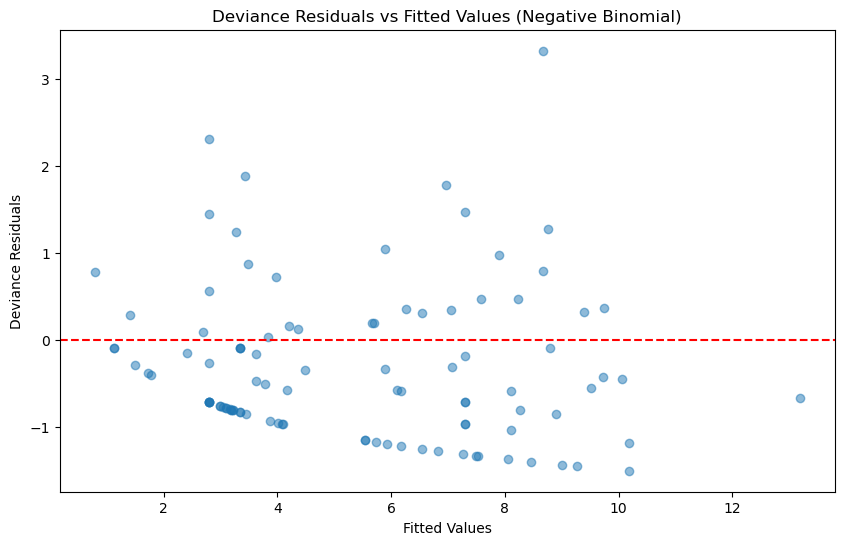

In [27]:
# Extract deviance residuals and fitted values
deviance_residuals3 = model_NegBin3.resid_deviance
fitted_values3 = model_NegBin3.fittedvalues

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values3, deviance_residuals3, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Deviance Residuals vs Fitted Values (Negative Binomial)')
plt.xlabel('Fitted Values')
plt.ylabel('Deviance Residuals')
plt.show()

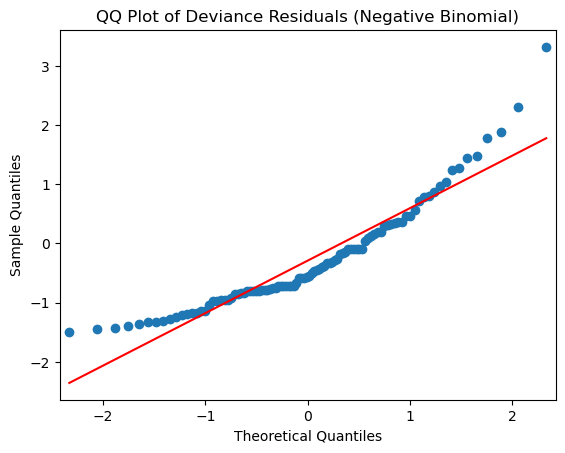

In [28]:
# QQ plot for deviance residuals
sm.qqplot(deviance_residuals3, line='s')
plt.title('QQ Plot of Deviance Residuals (Negative Binomial)')
plt.show()

In [29]:
# Poisson regression model 3
model_Poisson3 = sm.GLM(Y3, X3, family=sm.families.Poisson()).fit()

# Print the summary of the Poisson model
print(model_Poisson3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        highest_ranking   No. Observations:                  100
Model:                            GLM   Df Residuals:                       91
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -479.29
Date:                Sat, 07 Jun 2025   Deviance:                       665.47
Time:                        16:19:55   Pearson chi2:                 1.06e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.7611
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.3273      0.23

In [30]:
# Print out the AIC and BIC for the Poisson and NB models
print(f"Poisson Model AIC: {model_Poisson3.aic}, BIC: {model_Poisson3.bic}")
print(f"Negative Binomial Model AIC: {model_NegBin3.aic}, BIC: {model_NegBin3.bic}")

Poisson Model AIC: 976.5871257138992, BIC: 246.39536146057884
Negative Binomial Model AIC: 550.397219463346, BIC: -332.07927996706053


c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1838: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


### Model 4: Ranking ~ Mother ISEI, Father ISEI, Sibling Info, Association Dummies, Country Dummies 

In [34]:
# Define predictors for Model 4
predictors4 = ['mother_ISEI', 'father_ISEI', 'sibling_info', 'association_WTA'] + [f'country_{c.replace(" ", "_")}' for c in top_countries]

# Check multicollinearity using Variance Inflation Factor (VIF)
X4_vif = df[predictors4]
vif_data4 = pd.DataFrame({
    'Variable': X4_vif.columns,
    'VIF': [variance_inflation_factor(X4_vif.values, i)
            for i in range(X4_vif.shape[1])]
})
print("VIF with both ISEI scores:\n", vif_data4)

VIF with both ISEI scores:
             Variable       VIF
0        mother_ISEI  9.844285
1        father_ISEI  9.769509
2       sibling_info  8.490527
3    association_WTA  1.796871
4        country_USA  1.560187
5     country_Russia  1.164586
6  country_Australia  1.136073
7     country_France  1.141784
8      country_Spain  1.128897


In [35]:
# Compute correlation between mother and father ISEI
correlation_mother_father = df['mother_ISEI'].corr(df['father_ISEI'])
print(f"Correlation between mother ISEI and father ISEI: {correlation_mother_father:.2f}")

Correlation between mother ISEI and father ISEI: 0.17


In [36]:
# Prepare regression matrices for Model 4
Y4 = df['highest_ranking']
X4 = sm.add_constant(df[predictors4])

# Fit Negative Binomial regression model for Model 4
model_NegBin4 = sm.GLM(Y4, X4, family=NegativeBinomial()).fit()

# Print the summary of the Negative Binomial model for Model 4
print(model_NegBin4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        highest_ranking   No. Observations:                  100
Model:                            GLM   Df Residuals:                       90
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -260.68
Date:                Sat, 07 Jun 2025   Deviance:                       75.958
Time:                        16:29:16   Pearson chi2:                     110.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.2911
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2550      0.61

c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [37]:
# Check empirical dispersion from Negative Binomial model 4
dispersion4 = model_NegBin4.deviance / model_NegBin4.df_resid
print(f"Empirical Dispersion: {dispersion4:.2f}")

Empirical Dispersion: 0.84


In [39]:
# Calculate the "true" dispersion parameter for Model 4
nb2 = CountNB(Y4, X4).fit(disp=False, maxiter=100, method='LBFGS')

print("Converged:", nb2.mle_retvals['converged'])
print("Alpha estimate:", nb2.params['alpha'])

Converged: False
Alpha estimate: 0.740615400631128


c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


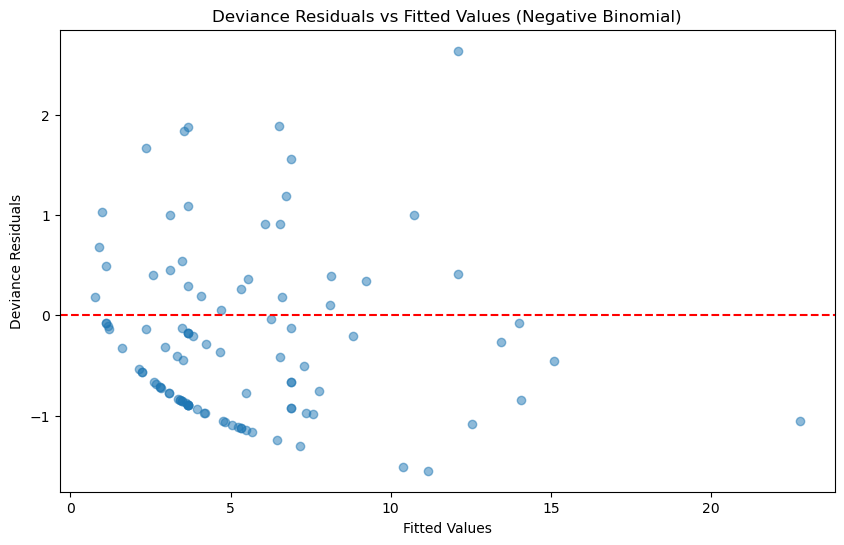

In [40]:
# Extract deviance residuals and fitted values
deviance_residuals4 = model_NegBin4.resid_deviance
fitted_values4 = model_NegBin4.fittedvalues

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values4, deviance_residuals4, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Deviance Residuals vs Fitted Values (Negative Binomial)')
plt.xlabel('Fitted Values')
plt.ylabel('Deviance Residuals')
plt.show()

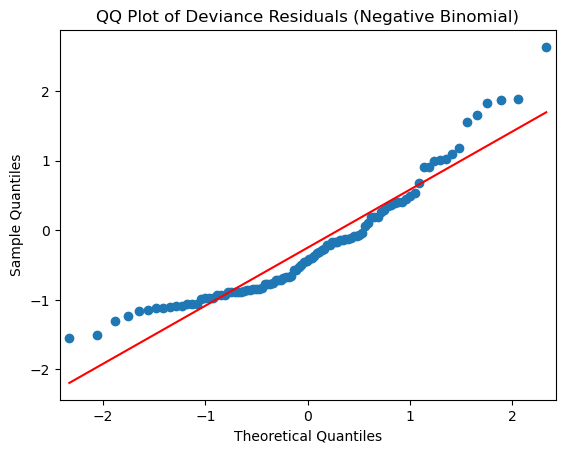

In [41]:
# QQ plot for deviance residuals
sm.qqplot(deviance_residuals4, line='s')
plt.title('QQ Plot of Deviance Residuals (Negative Binomial)')
plt.show()

In [42]:
# Poisson regression model 4
model_Poisson4 = sm.GLM(Y4, X4, family=sm.families.Poisson()).fit()

# Print the summary of the Poisson model
print(model_Poisson4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        highest_ranking   No. Observations:                  100
Model:                            GLM   Df Residuals:                       90
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -434.28
Date:                Sat, 07 Jun 2025   Deviance:                       575.44
Time:                        16:33:43   Pearson chi2:                     805.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9029
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.9987      0.27

In [43]:
# Print out the AIC and BIC for the Poisson and NB models
print(f"Poisson Model AIC: {model_Poisson4.aic}, BIC: {model_Poisson4.bic}")
print(f"Negative Binomial Model AIC: {model_NegBin4.aic}, BIC: {model_NegBin4.bic}")

Poisson Model AIC: 888.5630471584917, BIC: 160.97645309115939
Negative Binomial Model AIC: 541.3640979545947, BIC: -338.50723128982384


c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1838: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


### Model 5: Ranking ~ Mother ISEI, Father ISEI, Sibling Player, Association Dummies, Country Dummies

In [44]:
# Define predictors for Model 5
predictors5 = ['mother_ISEI', 'father_ISEI', 'sibling_player', 'association_WTA'] + [f'country_{c.replace(" ", "_")}' for c in top_countries]

# Check multicollinearity using Variance Inflation Factor (VIF)
X5_vif = df[predictors5]
vif_data5 = pd.DataFrame({
    'Variable': X5_vif.columns,
    'VIF': [variance_inflation_factor(X5_vif.values, i)
            for i in range(X5_vif.shape[1])]
})
print("VIF with both ISEI scores:\n", vif_data5)

VIF with both ISEI scores:
             Variable       VIF
0        mother_ISEI  8.001378
1        father_ISEI  9.044876
2     sibling_player  2.088483
3    association_WTA  1.782228
4        country_USA  1.555802
5     country_Russia  1.162107
6  country_Australia  1.107363
7     country_France  1.106788
8      country_Spain  1.136090


In [45]:
# Prepare regression matrices for Model 5
Y5 = df['highest_ranking']
X5 = sm.add_constant(df[predictors5])

# Fit Negative Binomial regression model for Model 5
model_NegBin5 = sm.GLM(Y5, X5, family=NegativeBinomial()).fit()

# Print the summary of the Negative Binomial model for Model 5
print(model_NegBin5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        highest_ranking   No. Observations:                  100
Model:                            GLM   Df Residuals:                       90
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -261.12
Date:                Sat, 07 Jun 2025   Deviance:                       76.829
Time:                        16:37:43   Pearson chi2:                     109.
No. Iterations:                    14   Pseudo R-squ. (CS):             0.2849
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.5890      0.54

c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [46]:
# Mean center the mother and father ISEI variables
df['mother_ISEI_c'] = df['mother_ISEI'] - df['mother_ISEI'].mean()
df['father_ISEI_c'] = df['father_ISEI'] - df['father_ISEI'].mean()

In [47]:
# Create interaction term between mother ISEI and sibling info
df['mother_ISEI_x_sibling_info'] = df['mother_ISEI_c'] * df['sibling_info']

### Model 6: Ranking ~ Mother ISEI, Father ISEI, Sibling Info, Mother ISEIxSibling Info interaction, Association Dummies, Country Dummies

In [50]:
# Define predictors for Model 6
predictors6 = ['mother_ISEI_c', 'father_ISEI_c', 'mother_ISEI_x_sibling_info', 'sibling_info', 'association_WTA'] + [f'country_{c.replace(" ", "_")}' for c in top_countries]

# Check multicollinearity using Variance Inflation Factor (VIF)
X6_vif = df[predictors6]
vif_data6 = pd.DataFrame({
    'Variable': X6_vif.columns,
    'VIF': [variance_inflation_factor(X6_vif.values, i)
            for i in range(X6_vif.shape[1])]
})
print("VIF with both ISEI scores and interaction between mother ISEI and sibling info:\n", vif_data6)

VIF with both ISEI scores and interaction between mother ISEI and sibling info:
                      Variable       VIF
0               mother_ISEI_c  8.785631
1               father_ISEI_c  1.072106
2  mother_ISEI_x_sibling_info  8.659004
3                sibling_info  2.821499
4             association_WTA  1.759568
5                 country_USA  1.541589
6              country_Russia  1.155217
7           country_Australia  1.137258
8              country_France  1.147338
9               country_Spain  1.130541


In [51]:
# Prepare regression matrices for Model 6
Y6 = df['highest_ranking']
X6 = sm.add_constant(df[predictors6])

# Fit Negative Binomial regression model for Model 6
model_NegBin6 = sm.GLM(Y6, X6, family=NegativeBinomial()).fit()
# Print the summary of the Negative Binomial model for Model 6
print(model_NegBin6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        highest_ranking   No. Observations:                  100
Model:                            GLM   Df Residuals:                       89
Model Family:        NegativeBinomial   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -260.61
Date:                Sat, 07 Jun 2025   Deviance:                       75.805
Time:                        16:41:02   Pearson chi2:                     110.
No. Iterations:                    81   Pseudo R-squ. (CS):             0.2922
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [52]:
# Print out the AIC and BIC for Model 5 and Model 7
print(f"Negative Binomial Model 5 AIC: {model_NegBin5.aic}, BIC: {model_NegBin5.bic}")
print(f"Negative Binomial Model 7 AIC: {model_NegBin6.aic}, BIC: {model_NegBin6.bic}")

Negative Binomial Model 5 AIC: 542.2346445036185, BIC: -337.6366847408001
Negative Binomial Model 7 AIC: 543.2114202609392, BIC: -334.0547387974914


c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1838: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [54]:
df['father_ISEI_x_association_WTA'] = df['father_ISEI_c'] * df['association_WTA']

### Model 7: Ranking ~ Mother ISEI, Father ISEI, Sibling Info, Father ISEIxAssociation intercation, Association Dummies, Country Dummies

In [58]:
# Define predictors for Model 7
predictors7 = ['mother_ISEI_c', 'father_ISEI_c', 'father_ISEI_x_association_WTA', 'sibling_info', 'association_WTA'] + [f'country_{c.replace(" ", "_")}' for c in top_countries]

# Check multicollinearity using Variance Inflation Factor (VIF)
X7_vif = df[predictors7]
vif_data7 = pd.DataFrame({
    'Variable': X7_vif.columns,
    'VIF': [variance_inflation_factor(X7_vif.values, i)
            for i in range(X7_vif.shape[1])]
})
print("VIF with both ISEI scores and interaction between father ISEI and association:\n", vif_data7)

VIF with both ISEI scores and interaction between father ISEI and association:
                         Variable       VIF
0                  mother_ISEI_c  1.212018
1                  father_ISEI_c  1.415657
2  father_ISEI_x_association_WTA  1.564524
3                   sibling_info  2.841161
4                association_WTA  1.702612
5                    country_USA  1.555749
6                 country_Russia  1.155615
7              country_Australia  1.141382
8                 country_France  1.183025
9                  country_Spain  1.147011


In [59]:
# Prepare regression matrices for Model 7
Y7 = df['highest_ranking']
X7 = sm.add_constant(df[predictors7])

# Fit Negative Binomial regression model for Model 7
model_NegBin7 = sm.GLM(Y7, X7, family=NegativeBinomial()).fit()

# Print the summary of the Negative Binomial model for Model 7
print(model_NegBin7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        highest_ranking   No. Observations:                  100
Model:                            GLM   Df Residuals:                       89
Model Family:        NegativeBinomial   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -260.09
Date:                Sat, 07 Jun 2025   Deviance:                       74.781
Time:                        17:21:44   Pearson chi2:                     110.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.2994
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [57]:
# Print out the AIC and BIC for Model 5 and Model 7
print(f"Negative Binomial Model 5 AIC: {model_NegBin5.aic}, BIC: {model_NegBin5.bic}")
print(f"Negative Binomial Model 7 AIC: {model_NegBin7.aic}, BIC: {model_NegBin7.bic}")

Negative Binomial Model 5 AIC: 542.2346445036185, BIC: -337.6366847408001
Negative Binomial Model 7 AIC: 874.3272431996381, BIC: -302.27033965151054


c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1838: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [60]:
df['mother_ISEI_x_father_ISEI'] = df['mother_ISEI_c'] * df['father_ISEI_c']

### Model 8: Ranking ~ Mother ISEI, Father ISEI, Sibling Info, Mother ISEIxFather ISEI interaction, Association Dummies, Country Dummies

In [61]:
# Define predictors for Model 8
predictors8 = ['mother_ISEI_c', 'father_ISEI_c', 'mother_ISEI_x_father_ISEI', 'sibling_info', 'association_WTA'] + [f'country_{c.replace(" ", "_")}' for c in top_countries]

# Check multicollinearity using Variance Inflation Factor (VIF)
X8_vif = df[predictors8]
vif_data8 = pd.DataFrame({
    'Variable': X8_vif.columns,
    'VIF': [variance_inflation_factor(X8_vif.values, i)
            for i in range(X8_vif.shape[1])]
})
print("VIF with both ISEI scores and interaction between mother ISEI and father ISEI:\n", vif_data8)

VIF with both ISEI scores and interaction between mother ISEI and father ISEI:
                     Variable       VIF
0              mother_ISEI_c  1.230526
1              father_ISEI_c  1.160891
2  mother_ISEI_x_father_ISEI  1.487720
3               sibling_info  2.793415
4            association_WTA  1.782659
5                country_USA  1.573861
6             country_Russia  1.208312
7          country_Australia  1.163367
8             country_France  1.164210
9              country_Spain  1.134411


In [62]:
# Prepare regression matrices for Model 8
Y8 = df['highest_ranking']
X8 = sm.add_constant(df[predictors8])

# Fit Negative Binomial regression model for Model 8
model_NegBin8 = sm.GLM(Y8, X8, family=NegativeBinomial()).fit()

# Print the summary of the Negative Binomial model for Model 8
print(model_NegBin8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        highest_ranking   No. Observations:                  100
Model:                            GLM   Df Residuals:                       89
Model Family:        NegativeBinomial   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -259.92
Date:                Sat, 07 Jun 2025   Deviance:                       74.427
Time:                        17:23:59   Pearson chi2:                     103.
No. Iterations:                    17   Pseudo R-squ. (CS):             0.3019
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [63]:
# Print out the AIC and BIC for Model 5 and Model 8
print(f"Negative Binomial Model 5 AIC: {model_NegBin5.aic}, BIC: {model_NegBin5.bic}")
print(f"Negative Binomial Model 8 AIC: {model_NegBin8.aic}, BIC: {model_NegBin8.bic}")

Negative Binomial Model 5 AIC: 542.2346445036185, BIC: -337.6366847408001
Negative Binomial Model 8 AIC: 541.8325328295044, BIC: -335.433626228926


c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1838: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [64]:
df['mother_ISEI_x_country_Spain'] = df['mother_ISEI_c'] * df['country_Spain']
df['father_ISEI_x_country_Spain'] = df['father_ISEI_c'] * df['country_Spain']

### Model 9: Ranking ~ Mother ISEI, Father ISEI, Sibling Info, Mother ISEIxCountry Spain intercation, Association Dummies, Country Dummies

In [67]:
# Define predictors for Model 9
predictors9 = ['mother_ISEI_c', 'father_ISEI_c', 'mother_ISEI_x_country_Spain', 'sibling_info', 'association_WTA'] + [f'country_{c.replace(" ", "_")}' for c in top_countries]

# Check multicollinearity using Variance Inflation Factor (VIF)
X9_vif = df[predictors9]
vif_data9 = pd.DataFrame({
    'Variable': X9_vif.columns,
    'VIF': [variance_inflation_factor(X9_vif.values, i)
            for i in range(X9_vif.shape[1])]
})
print("VIF with both ISEI scores and interaction between mother ISEI and country Spain:\n", vif_data9)

VIF with both ISEI scores and interaction between mother ISEI and father ISEI:
                       Variable       VIF
0                mother_ISEI_c  1.153920
1                father_ISEI_c  1.081610
2  mother_ISEI_x_country_Spain  1.134067
3                 sibling_info  2.821190
4              association_WTA  1.757356
5                  country_USA  1.537413
6               country_Russia  1.149788
7            country_Australia  1.137229
8               country_France  1.149663
9                country_Spain  1.177521


In [68]:
# Prepare regression matrices for Model 9
Y9 = df['highest_ranking']
X9 = sm.add_constant(df[predictors9])

# Fit Negative Binomial regression model for Model 9
model_NegBin9 = sm.GLM(Y9, X9, family=NegativeBinomial()).fit()

# Print the summary of the Negative Binomial model for Model 9
print(model_NegBin9.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        highest_ranking   No. Observations:                  100
Model:                            GLM   Df Residuals:                       89
Model Family:        NegativeBinomial   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -260.68
Date:                Sat, 07 Jun 2025   Deviance:                       75.955
Time:                        17:31:05   Pearson chi2:                     110.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.2911
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [69]:
# Print out the AIC and BIC for Model 5 and Model 9
print(f"Negative Binomial Model 5 AIC: {model_NegBin5.aic}, BIC: {model_NegBin5.bic}")
print(f"Negative Binomial Model 9 AIC: {model_NegBin9.aic}, BIC: {model_NegBin9.bic}")

Negative Binomial Model 5 AIC: 542.2346445036185, BIC: -337.6366847408001
Negative Binomial Model 9 AIC: 543.3609927409526, BIC: -333.90516631747806


c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1838: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


### Model 10: Ranking ~ Mother ISEI, Father ISEI, Sibling Info, Father ISEIxCountry Spain intercation, Association Dummies, Country Dummies

In [70]:
# Define predictors for Model 10
predictors10 = ['mother_ISEI_c', 'father_ISEI_c', 'father_ISEI_x_country_Spain', 'sibling_info', 'association_WTA'] + [f'country_{c.replace(" ", "_")}' for c in top_countries]

# Check multicollinearity using Variance Inflation Factor (VIF)
X10_vif = df[predictors10]
vif_data10 = pd.DataFrame({
    'Variable': X10_vif.columns,
    'VIF': [variance_inflation_factor(X10_vif.values, i)
            for i in range(X10_vif.shape[1])]
})
print("VIF with both ISEI scores and interaction between father ISEI and country Spain:\n", vif_data10)

VIF with both ISEI scores and interaction between father ISEI and country Spain:
                       Variable       VIF
0                mother_ISEI_c  1.116626
1                father_ISEI_c  1.114565
2  father_ISEI_x_country_Spain  1.188026
3                 sibling_info  2.790023
4              association_WTA  1.700563
5                  country_USA  1.537766
6               country_Russia  1.149244
7            country_Australia  1.136917
8               country_France  1.147331
9                country_Spain  1.250244


In [72]:
# Prepare regression matrices for Model 10
Y10 = df['highest_ranking']
X10 = sm.add_constant(df[predictors10])

# Fit Negative Binomial regression model for Model 10
model_NegBin10 = sm.GLM(Y10, X10, family=NegativeBinomial()).fit()

# Print the summary of the Negative Binomial model for Model 10
print(model_NegBin10.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        highest_ranking   No. Observations:                  100
Model:                            GLM   Df Residuals:                       89
Model Family:        NegativeBinomial   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -260.62
Date:                Sat, 07 Jun 2025   Deviance:                       75.833
Time:                        18:24:09   Pearson chi2:                     110.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.2920
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [73]:
# Print out the AIC and BIC for Model 5 and Model 10
print(f"Negative Binomial Model 5 AIC: {model_NegBin5.aic}, BIC: {model_NegBin5.bic}")
print(f"Negative Binomial Model 10 AIC: {model_NegBin10.aic}, BIC: {model_NegBin10.bic}")

Negative Binomial Model 5 AIC: 542.2346445036185, BIC: -337.6366847408001
Negative Binomial Model 10 AIC: 543.2394431147745, BIC: -334.0267159436562


c:\Users\peta_\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1838: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
